In [42]:
import json

from pathlib import Path

import pandas as pd
import numpy as np

import biopsykit as bp


from biopsykit.classification.model_selection import SklearnPipelinePermuter

import matplotlib.pyplot as plt

%matplotlib widget
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [43]:
model_path = Path("../../results/models")
data_path = Path("../../results/train_test_data")

### Permuter 1: Scaling, Feature Elimination, NearestNeighbor, DecisionTree

In [44]:
permuter1 = SklearnPipelinePermuter.from_pickle(model_path.joinpath("Feature_Elimination_NN_DT_MAE_all_algos.pkl"))
permuter1.metric_summary()

true_labels  \
pipeline_scaler pipeline_reduce_dim pipeline_clf                                                               
StandardScaler  SelectKBest         KNeighborsRegressor    [[622.0], [1231.0], [3342.0], [4596.0], [5233....   
                                    DecisionTreeRegressor  [[622.0], [1231.0], [3342.0], [4596.0], [5233....   
MinMaxScaler    SelectKBest         KNeighborsRegressor    [[622.0], [1231.0], [3342.0], [4596.0], [5233....   
                                    DecisionTreeRegressor  [[622.0], [1231.0], [3342.0], [4596.0], [5233....   

                                                                                           true_labels_folds  \
pipeline_scaler pipeline_reduce_dim pipeline_clf                                                               
StandardScaler  SelectKBest         KNeighborsRegressor    [[[622.0], [1231.0], [3342.0], [4596.0], [5233...   
                                    DecisionTreeRegressor  [[[622.0], [1231.0], [3342.0], [4596.0], [5233...   
MinMaxScaler    SelectKBest         KNeighborsRegressor    [[[622.0], [1231.0], [3342.0], [4596.0], [5233...   
                                    DecisionTreeRegressor  [[[622.0], [1231.0], [3342.0], [4596.0], [5233...   

                                                                                            predicted_labels  \
pipeline_scaler pipeline_reduce_dim pipeline_clf                                                               
StandardScaler  SelectKBest         KNeighborsRegressor    [[625.1607489222912], [1266.2265327292546], [3...   
                                    DecisionTreeRegressor  [1145.0, 1145.0, 3997.0, 5322.0, 5322.0, 5322....   
MinMaxScaler    SelectKBest         KNeighborsRegressor    [[625.159650067636], [1266.2266325408295], [33...   
                                    DecisionTreeRegressor  [706.0, 1412.5, 3611.5, 4270.0, 5014.0, 5701.0...   

                                                                                      predicted_labels_folds  \
pipeline_scaler pipeline_reduce_dim pipeline_clf                                                               
StandardScaler  SelectKBest         KNeighborsRegressor    [[[625.1607489222912], [1266.2265327292546], [...   
                                    DecisionTreeRegressor  [[1145.0, 1145.0, 3997.0, 5322.0, 5322.0, 5322...   
MinMaxScaler    SelectKBest         KNeighborsRegressor    [[[625.159650067636], [1266.2266325408295], [3...   
                                    DecisionTreeRegressor  [[706.0, 1412.5, 3611.5, 4270.0, 5014.0, 5701....   

                                                                                               train_indices  \
pipeline_scaler pipeline_reduce_dim pipeline_clf                                                               
StandardScaler  SelectKBest         KNeighborsRegressor    [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...   
                                    DecisionTreeRegressor  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...   
MinMaxScaler    SelectKBest         KNeighborsRegressor    [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...   
                                    DecisionTreeRegressor  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...   

                                                                                         train_indices_folds  \
pipeline_scaler pipeline_reduce_dim pipeline_clf                                                               
StandardScaler  SelectKBest         KNeighborsRegressor    [[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13...   
                                    DecisionTreeRegressor  [[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13...   
MinMaxScaler    SelectKBest         KNeighborsRegressor    [[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13...   
                                    DecisionTreeRegressor  [[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13...   

                                                           

In [46]:
permuter1.best_hyperparameter_pipeline()

mean_test_neg_mean_absolute_error  param_clf__n_neighbors  \
outer_fold                                                              
0                                  -13.246095                    10.0   
1                                  -13.605514                    10.0   
2                                  -13.304643                    10.0   
3                                  -13.697112                    10.0   
4                                  -13.283130                    10.0   

           param_clf__weights param_reduce_dim__k  \
outer_fold                                          
0                    distance                   4   
1                    distance                   4   
2                    distance                   4   
3                    distance                   4   
4                    distance                   4   

                                                       params  \
outer_fold                                                      
0           {'clf__n_neighbors': 10, 'clf__weights': 'dist...   
1           {'clf__n_neighbors': 10, 'clf__weights': 'dist...   
2           {'clf__n_neighbors': 10, 'clf__weights': 'dist...   
3           {'clf__n_neighbors': 10, 'clf__weights': 'dist...   
4           {'clf__n_neighbors': 10, 'clf__weights': 'dist...   

            rank_test_neg_mean_absolute_error  \
outer_fold                                      
0                                           1   
1                                           2   
2                                           2   
3                                           2   
4                                           1   

            split0_test_neg_mean_absolute_error  \
outer_fold                                        
0                                    -13.794209   
1                                    -12.965459   
2                                    -12.875830   
3                                    -13.559923   
4                                    -12.477156   

            split1_test_neg_mean_absolute_error  \
outer_fold                                        
0                                    -13.509339   
1                                    -13.345123   
2                                    -14.086747   
3                                    -13.450463   
4                                    -12.114807   

            split2_test_neg_mean_absolute_error  \
outer_fold                                        
0                                    -13.273258   
1                                    -13.275577   
2                                    -12.856881   
3                                    -13.485400   
4                                    -14.413332   

            split3_test_neg_mean_absolute_error  \
outer_fold                                        
0                                    -12.268557   
1                                    -13.840553   
2                                    -13.635271   
3                                    -13.373981   
4                                    -14.381286   

            split4_test_neg_mean_absolute_error  \
outer_fold                                        
0                                    -13.385112   
1                                    -14.600858   
2                                    -13.068486   
3                                    -14.615791   
4                                    -13.029069   

            std_test_neg_mean_absolute_error  
outer_fold                                    
0                                   0.518724  
1                                   0.571364  
2                                   0.481901  
3                                   0.463220  
4                                   0.955241

### Permuter 2: Feature Elimination, NearestNeighbor, DecisionTree

In [47]:
permuter2 = SklearnPipelinePermuter.from_pickle(model_path.joinpath("NoScaling_Feature_Elimination_NN_DT_MAE_all_algos.pkl"))
permuter2.metric_summary()

true_labels  \
pipeline_reduce_dim pipeline_clf                                                               
SelectKBest         KNeighborsRegressor    [[622.0], [1231.0], [3342.0], [4596.0], [5233....   
                    DecisionTreeRegressor  [[622.0], [1231.0], [3342.0], [4596.0], [5233....   

                                                                           true_labels_folds  \
pipeline_reduce_dim pipeline_clf                                                               
SelectKBest         KNeighborsRegressor    [[[622.0], [1231.0], [3342.0], [4596.0], [5233...   
                    DecisionTreeRegressor  [[[622.0], [1231.0], [3342.0], [4596.0], [5233...   

                                                                            predicted_labels  \
pipeline_reduce_dim pipeline_clf                                                               
SelectKBest         KNeighborsRegressor    [[621.4538558826036], [1266.0946879853618], [3...   
                    DecisionTreeRegressor  [1213.9064039408868, 1213.9064039408868, 3205....   

                                                                      predicted_labels_folds  \
pipeline_reduce_dim pipeline_clf                                                               
SelectKBest         KNeighborsRegressor    [[[621.4538558826036], [1266.0946879853618], [...   
                    DecisionTreeRegressor  [[1213.9064039408868, 1213.9064039408868, 3205...   

                                                                               train_indices  \
pipeline_reduce_dim pipeline_clf                                                               
SelectKBest         KNeighborsRegressor    [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...   
                    DecisionTreeRegressor  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...   

                                                                         train_indices_folds  \
pipeline_reduce_dim pipeline_clf                                                               
SelectKBest         KNeighborsRegressor    [[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13...   
                    DecisionTreeRegressor  [[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13...   

                                                                                test_indices  \
pipeline_reduce_dim pipeline_clf                                                               
SelectKBest         KNeighborsRegressor    [1397, 1398, 1399, 1400, 1401, 1402, 1403, 140...   
                    DecisionTreeRegressor  [1397, 1398, 1399, 1400, 1401, 1402, 1403, 140...   

                                                                          test_indices_folds  \
pipeline_reduce_dim pipeline_clf                                                               
SelectKBest         KNeighborsRegressor    [[1397, 1398, 1399, 1400, 1401, 1402, 1403, 14...   
                    DecisionTreeRegressor  [[1397, 1398, 1399, 1400, 1401, 1402, 1403, 14...   

                                           mean_test_neg_mean_absolute_error  \
pipeline_reduce_dim pipeline_clf                                               
SelectKBest         KNeighborsRegressor                            13.582303   
                    DecisionTreeRegressor                         222.539575   

                                           std_test_neg_mean_absolute_error  \
pipeline_reduce_dim pipeline_clf                                              
SelectKBest         KNeighborsRegressor                            0.746850   
                    DecisionTreeRegressor                         82.686297   

                                           test_neg_mean_absolute_error_fold_0  \
pipeline_reduce_dim pipeline_clf                                                 
SelectKBest         KNeighborsRegressor                              14.267191   
                    DecisionTreeRegressor                           384.686181   

                                  

## Compare the ML output with the reference labels and the best performing algos

In [48]:
best_estimate = permuter1.metric_summary()["predicted_labels"].loc[("StandardScaler", "SelectKBest", "KNeighborsRegressor")]
best_estimate

array([[  625.16074892],
       [ 1266.22653273],
       [ 3339.76975689],
       ...,
       [57160.17965856],
       [58172.27953534],
       [59203.12253771]])

In [49]:
reference_labels = permuter1.metric_summary()["true_labels"].loc[("StandardScaler", "SelectKBest", "KNeighborsRegressor")]
reference_labels

array([[  622.],
       [ 1231.],
       [ 3342.],
       ...,
       [57162.],
       [58122.],
       [59188.]])

#### Compute the absolute errors of the algo outputs

In [50]:
abs_error_estimator = np.abs(best_estimate - reference_labels)[:,0]
abs_error_estimator

array([ 3.16074892, 35.22653273,  2.23024311, ...,  1.82034144,
       50.27953534, 15.12253771])

In [58]:
np.mean(abs_error_estimator)

13.02708521061543

### Load the computed labels of algorithms that showed good performance

In [51]:
reference = pd.read_csv(data_path.joinpath("target_data_all_algos.csv")).drop(columns=["Unnamed: 0"])
reference

participant condition     phase  heartbeat_idreference  \
0          VP_001     ftsst      Math                      1   
1          VP_001     ftsst      Math                      2   
2          VP_001     ftsst      Math                      3   
3          VP_001     ftsst      Math                      4   
4          VP_001     ftsst      Math                      5   
...           ...       ...       ...                    ...   
10392     GDN0030   default  Valsalva                     51   
10393     GDN0030   default  Valsalva                     52   
10394     GDN0030   default  Valsalva                     53   
10395     GDN0030   default  Valsalva                     54   
10396     GDN0030   default  Valsalva                     55   

       b_point_samplereference  
0                       1074.0  
1                       1849.0  
2                       2518.0  
3                       3252.0  
4                       3933.0  
...                        ...  
10392                  55194.0  
10393                  56172.0  
10394                  57162.0  
10395                  58122.0  
10396                  59188.0  

[10397 rows x 5 columns]

In [52]:
algo_outputs = pd.read_csv(data_path.joinpath("train_data_all_algos.csv")).drop(columns=["Unnamed: 0"])
algo_outputs

participant condition     phase  heartbeat_idreference  \
0          VP_001     ftsst      Math                      1   
1          VP_001     ftsst      Math                      2   
2          VP_001     ftsst      Math                      3   
3          VP_001     ftsst      Math                      4   
4          VP_001     ftsst      Math                      5   
...           ...       ...       ...                    ...   
10392     GDN0030   default  Valsalva                     51   
10393     GDN0030   default  Valsalva                     52   
10394     GDN0030   default  Valsalva                     53   
10395     GDN0030   default  Valsalva                     54   
10396     GDN0030   default  Valsalva                     55   

       arbol2017-isoelectric-crossings_forouzanfar2018  \
0                                               1111.0   
1                                               1844.0   
2                                               2558.0   
3                                               3264.0   
4                                               3942.0   
...                                                ...   
10392                                          55162.0   
10393                                          56146.0   
10394                                          57182.0   
10395                                          58148.0   
10396                                          59182.0   

       arbol2017-isoelectric-crossings_linear-interpolation  \
0                                                 1111.0      
1                                                 1844.0      
2                                                 2558.0      
3                                                 3264.0      
4                                                 3942.0      
...                                                  ...      
10392                                            55162.0      
10393                                            56146.0      
10394                                            57182.0      
10395                                            58148.0      
10396                                            59182.0      

       arbol2017-isoelectric-crossings_none  \
0                                    1111.0   
1                                    1844.0   
2                                    2558.0   
3                                    3264.0   
4                                    3942.0   
...                                     ...   
10392                               55162.0   
10393                               56146.0   
10394                               57182.0   
10395                               58148.0   
10396                               59182.0   

       arbol2017-second-derivative_forouzanfar2018  \
0                                           1080.0   
1                                           1810.0   
2                                           2494.0   
3                                           3215.0   
4                                           3881.0   
...                                            ...   
10392                                      55108.0   
10393                                      56086.0   
10394                                      57114.0   
10395                                      58090.0   
10396                                      59168.0   

       arbol2017-second-derivative_linear-interpolation  \
0                                                1080.0   
1                                                1809.0   
2                                                2494.0   
3                                                3212.0   
4                                                3879.0   
...                                                 ...   
10392                                           55108.0   
10393                                           56086.0   
10394                                 

In [53]:
drost_2022_none = algo_outputs["drost2022_none"]
lozano_2007_linear_regression_none = algo_outputs["lozano2007-linear-regression_none"]
stern_1985_linear_interpolation = algo_outputs["stern1985_linear-interpolation"]

#### Compute the absolute errors of the algo outputs

In [56]:
abs_error_drost_2022_none = np.abs(drost_2022_none - reference["b_point_samplereference"])
abs_error_lozano_2007_linear_regression_none = np.abs(lozano_2007_linear_regression_none - reference["b_point_samplereference"])
abs_error_stern_1985_linear_interpolation = np.abs(stern_1985_linear_interpolation - reference["b_point_samplereference"])

In [57]:
np.mean(abs_error_lozano_2007_linear_regression_none)

18.400981052226605

# Visualize the results in a boxplot

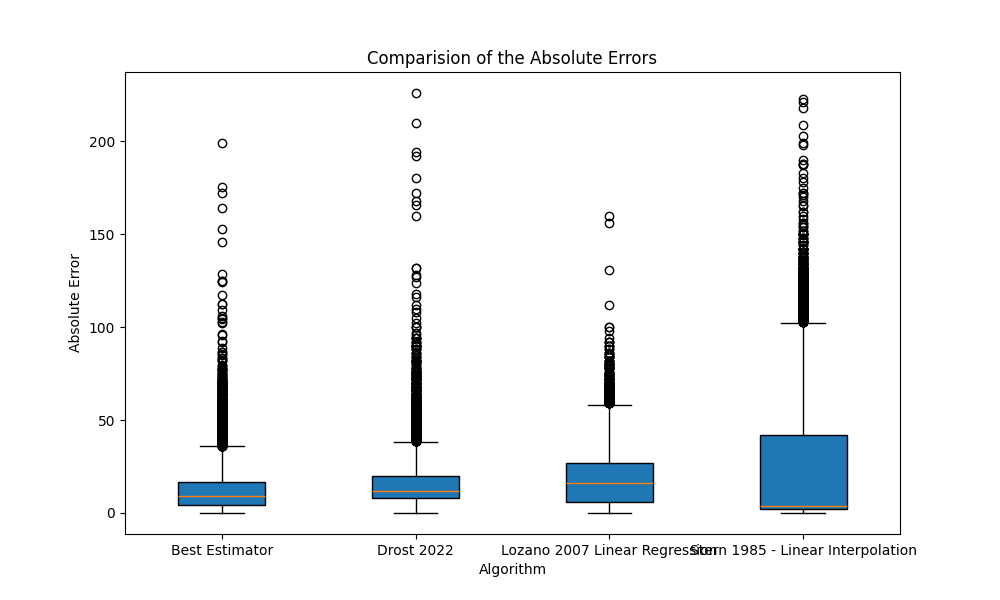

In [41]:
data = [abs_error_estimator, abs_error_drost_2022_none, abs_error_lozano_2007_linear_regression_none, abs_error_stern_1985_linear_interpolation]
labels = ["Best Estimator", "Drost 2022", "Lozano 2007 Linear Regression", "Stern 1985 - Linear Interpolation"]

plt.figure(figsize=(10, 6))
plt.boxplot(data, patch_artist=True, labels=labels)
plt.title("Comparision of the Absolute Errors")
plt.xlabel("Algorithm")
plt.ylabel("Absolute Error")
plt.show()